# Week 6 - Trees

## Decision Trees

A decision tree is a decision support tool that uses a tree-like model of decisions and their possible consequences, including chance event outcomes, resource costs, and utility. It is one way to display an algorithm that only contains conditional control statements.

https://en.wikipedia.org/wiki/Decision_tree

                                       Carry an umbrella today?
                                         Is it cloudy today?
                                            (Root Node)
                                                /\
                                           yes /  \ no
                                              /    \
                                         chance    no umbrella
                                        of rain?      
                                            /\
                                       yes /  \ no
                                          /    \
                                  umbrella     no umbrella
                                   

### Decision Tree Terms

* Root Node: Represents our population from which two or more subsets are divided up
* Decision Node: Sub-nodes divided into more sub-nodes based on a decision
* Splitting: dividing a node into sub-nodes
* Leaf / Terminal Node: Node with no children or sub-nodes
* Branch: A section of a decision tree
* Pruning: Eliminating branches and nodes
* Parent / Children: The relationship between nodes and their sub-nodes

## Cross Validation

Learning the parameters of a prediction function and testing it on the same data is a methodological mistake: a model that would just repeat the labels of the samples that it has just seen would have a perfect score but would fail to predict anything useful on yet-unseen data. This situation is called overfitting. To avoid it, it is common practice when performing a (supervised) machine learning experiment to hold out part of the available data as a test set X_test, y_test.

https://scikit-learn.org/stable/modules/cross_validation.html:

Sometimes called rotation estimation or out-of-sample testing, is any of various similar model validation techniques for assessing how the results of a statistical analysis will generalize to an independent data set. It is mainly used in settings where the goal is prediction, and one wants to estimate how accurately a predictive model will perform in practice. In a prediction problem, a model is usually given a dataset of known data on which training is run (training dataset), and a dataset of unknown data (or first seen data) against which the model is tested (called the validation dataset or testing set). The goal of cross-validation is to test the model's ability to predict new data that was not used in estimating it, in order to flag problems like overfitting or selection bias and to give an insight on how the model will generalize to an independent dataset (i.e., an unknown dataset, for instance from a real problem).

https://en.wikipedia.org/wiki/Cross-validation_(statistics)

## K-fold Cross Validation 

In k-fold cross-validation, the original sample is randomly partitioned into k equal sized subsamples. Of the k subsamples, a single subsample is retained as the validation data for testing the model, and the remaining k − 1 subsamples are used as training data. The cross-validation process is then repeated k times, with each of the k subsamples used exactly once as the validation data. The k results can then be averaged to produce a single estimation. The advantage of this method over repeated random sub-sampling is that all observations are used for both training and validation, and each observation is used for validation exactly once. 10-fold cross-validation is commonly used, but in general k remains an unfixed parameter.

https://en.wikipedia.org/wiki/Cross-validation_(statistics)#k-fold_cross-validation

### Underfitting and Overfitting

In statistics, overfitting is "the production of an analysis that corresponds too closely or exactly to a particular set of data, and may therefore fail to fit additional data or predict future observations reliably". An overfitted model is a statistical model that contains more parameters than can be justified by the data.

If you're overfitting, or you are getting great training scores and poor  test scores, try removing the lesser performing features. The model is just memorizing the training data.

Underfitting occurs when a statistical model cannot adequately capture the underlying structure of the data. An under-fitted model is a model where some parameters or terms that would appear in a correctly specified model are missing.[2] Under-fitting would occur, for example, when fitting a linear model to non-linear data. Such a model will tend to have poor predictive performance.

If you're underfitting, or you are getting poor training scores and test scores, try adding more data or more features.

https://en.wikipedia.org/wiki/Overfitting

Please review the following regarding under-fitting and over-fitting:<br />
https://scikit-learn.org/stable/auto_examples/model_selection/plot_underfitting_overfitting.html

### Underfitting / Overfitting Fixes

#### Underfitting
* Get more data
* Get more features

#### Overfitting:
* Cross Validation
* Regularization
* Remove weak features

https://medium.com/ml-research-lab/under-fitting-over-fitting-and-its-solution-dc6191e34250

## Cross Validation Using a Decision Tree Classifier

https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import accuracy_score

iris = load_iris()
X = iris.data
y = iris.target

df = pd.DataFrame(data=X, columns=iris.feature_names)
df['species'] = y
X_train, X_test, y_train, y_test = train_test_split(df.drop('species', axis=1), df['species'], test_size=0.20)


model = DecisionTreeClassifier()
model.fit(X_train,y_train)
predictions = model.predict(X_test)

print(cross_val_score(model, X_train, y_train, cv=10))
print(f'With Cross Validation: {cross_val_score(model, X_train, y_train, cv=10).mean()}') 
print(f'Without Cross Validation: {accuracy_score(y_test, predictions)}')

[1.         1.         1.         0.91666667 1.         0.91666667
 0.91666667 0.83333333 0.91666667 1.        ]
With Cross Validation: 0.95
Without Cross Validation: 0.9333333333333333


## Hyperparameters and Random Forests

* https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
* https://www.analyticsvidhya.com/blog/2022/05/handling-missing-values-with-random-forest/

The way to build a good model is through data collection, data cleaning, feature selection, and feature engineering. After we have done all of this, it is then time to optimize our model's performance through its hyperparameters. 

An ensemble learning method for classification, regression and other tasks that operate by constructing a multitude of decision trees at training time and outputting the class that is the mode of the classes (classification) or mean/average prediction (regression) of the individual trees.

https://en.wikipedia.org/wiki/Random_forest

In statistics and machine learning, **ensemble methods** use multiple learning algorithms to obtain better predictive performance than could be obtained from any of the constituent learning algorithms alone.

https://en.wikipedia.org/wiki/Ensemble_learning

### Hyperparameter

A parameter whose value is used to control the learning process. By contrast, the values of other parameters (typically node weights) are derived via training.

https://en.wikipedia.org/wiki/Hyperparameter_(machine_learning)

**Parameters vs Hyperparameters**:
* Parameter: Usually estimated or learned from data
* Hyperparameter: Values that are tuned by the data scientist

Here are some default parameters:

<pre>
hyperparameters = {
            'n_estimators': 100,
            'criterion': 'gini',
            'max_depth': None,
            'max_leaf_nodes': None,
            'bootstrap': True
            }

model = RandomForestClassifier()
</pre>

The traditional way of performing hyperparameter optimization has been **grid search**, or a parameter sweep, which is simply an exhaustive searching through a manually specified subset of the hyperparameter space of a learning algorithm. A grid search algorithm must be guided by some performance metric, typically measured by cross-validation on the training set or evaluation on a held-out validation set.

https://en.wikipedia.org/wiki/Hyperparameter_optimization#Grid_search

## Grid Search

In machine learning, hyperparameter optimization or tuning is the problem of choosing a set of optimal hyperparameters for a learning algorithm. A hyperparameter is a parameter whose value is used to control the learning process. By contrast, the values of other parameters (typically node weights) are learned... The traditional way of performing hyperparameter optimization has been grid search, or a parameter sweep, which is simply an exhaustive searching through a manually specified subset of the hyperparameter space of a learning algorithm. A grid search algorithm must be guided by some performance metric, typically measured by cross-validation on the training set or evaluation on a held-out validation set.

https://en.wikipedia.org/wiki/Hyperparameter_optimization

**The following code will take some time because it has to create a different model for each of the values we provide**

The hyperparameters have been limited so that the code runs faster. More values would give us a better idea of how accurate our model is.

In [2]:
# example of randomforest classifier, grid search, and cross validation (code example for assignment)
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris.target

X_train, X_test, y_train, y_test = train_test_split(df.drop('target', axis=1), df['target'], test_size=0.25, random_state=42)

hyperparameters = {
            'n_estimators': [50, 200],
            'criterion': ['entropy', 'gini'],
            'max_depth': [3, 4],
            'max_leaf_nodes': [7, 9],
            'bootstrap': [True, False]
            }

grid_search = GridSearchCV(estimator = RandomForestClassifier(),
                           param_grid = hyperparameters,
                           scoring = 'accuracy',
                           cv = 10)

grid_search = grid_search.fit(X_train, y_train)

best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_

print('best accuracy', best_accuracy)
print('best parameters', best_parameters)

best accuracy 0.9462121212121211
best parameters {'bootstrap': True, 'criterion': 'entropy', 'max_depth': 3, 'max_leaf_nodes': 9, 'n_estimators': 50}


### Attribute Selection Measures

* Gini Index/Impurity: Used by the CART (classification and regression tree) algorithm for classification trees, Gini impurity is a measure of how often a randomly chosen element from the set would be incorrectly labeled if it was randomly labeled according to the distribution of labels in the subset. https://en.wikipedia.org/wiki/Decision_tree_learning#Gini_impurity
* Entropy: In information theory, the entropy of a random variable is the average level of "information", "surprise", or "uncertainty" inherent in the variable's possible outcomes. The concept of information entropy was introduced by Claude Shannon in his 1948 paper "A Mathematical Theory of Communication", and is sometimes called Shannon entropy in his honour. https://en.wikipedia.org/wiki/Entropy_(information_theory)
* Information Gain: Information gain is used to decide which feature to split on at each step in building the tree. Simplicity is best, so we want to keep our tree small. To do so, at each step we should choose the split that results in the most consistent child nodes. A commonly used measure of consistency is called information which is measured in bits. For each node of the tree, the information value "represents the expected amount of information that would be needed to specify whether a new instance should be classified yes or no, given that the example reached that node". 
* https://en.wikipedia.org/wiki/Decision_tree_learning#Information_gain
* https://datascience.foundation/sciencewhitepaper/understanding-decision-trees-with-python

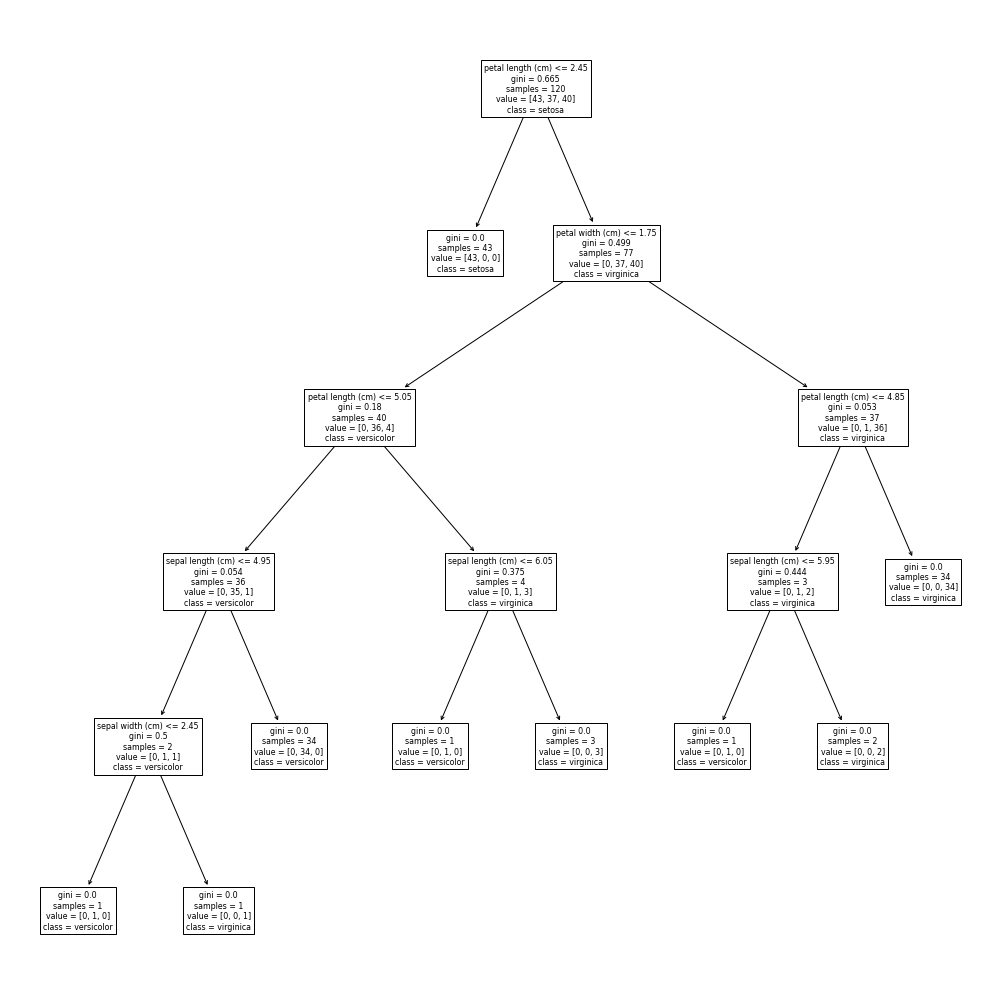

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split

iris = load_iris()
X = iris.data
y = iris.target

df = pd.DataFrame(data=X, columns=iris.feature_names)
df['species'] = y
X_train, X_test, y_train, y_test = train_test_split(df.drop('species', axis=1), df['species'], test_size=0.20)

model = DecisionTreeClassifier(criterion='gini', random_state=42).fit(X_train, y_train)

plt.figure(figsize=(14, 14))
tree.plot_tree(model,
              feature_names=X_train.columns,
              class_names=['setosa', 'versicolor', 'virginica'],
              filled=False)

plt.tight_layout();

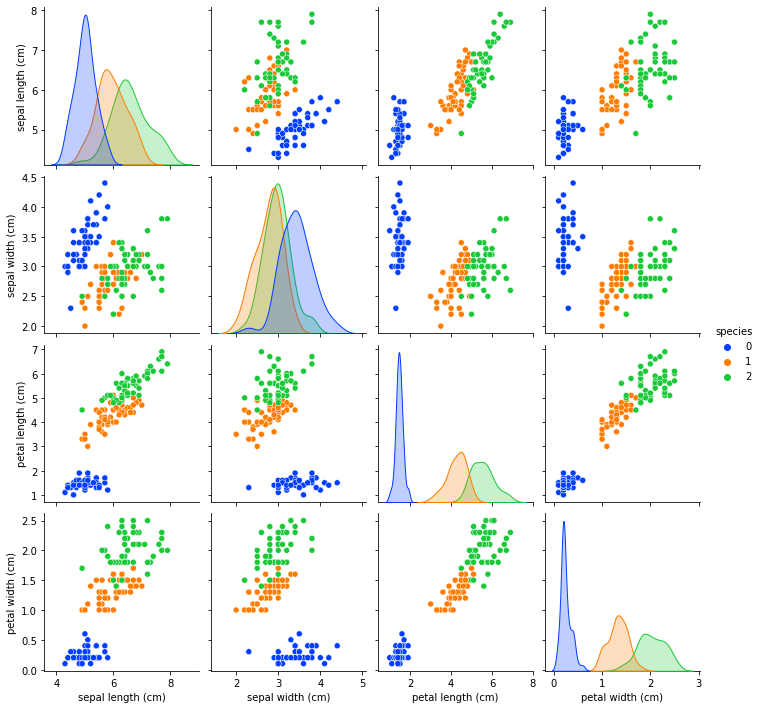

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


sns.pairplot(df, hue='species', palette='bright');

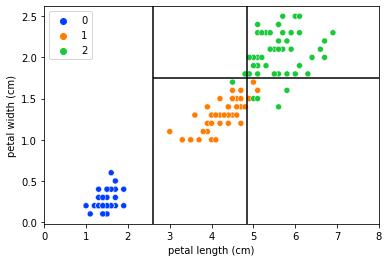

In [5]:
# plot using hue to show different classes
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(x=df['petal length (cm)'], y=df['petal width (cm)'], hue=y, palette='bright')
plt.axvline(x=2.6, color='black')
plt.hlines(y=1.75, xmin=2.6, xmax=8, color='black')
plt.axvline(x=4.85, color='black')


plt.xlim(0, 8)
plt.legend()
plt.show()

## Gini

In [6]:
# https://archive.ics.uci.edu/ml/datasets/balloons
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

df = pd.read_csv('yellow-small+adult-stretch.data')
df.columns = ['Color', 'size', 'act', 'age', 'inflated']
print(df.head())

le = LabelEncoder()
for feat in df.columns:
    df[feat] = le.fit_transform(df[feat])

X = df.drop('inflated', axis=1)
y = df['inflated']


print(X.head())
print(y.head())


    Color   size      act    age inflated
0  YELLOW  SMALL  STRETCH  CHILD        T
1  YELLOW  SMALL      DIP  ADULT        T
2  YELLOW  SMALL      DIP  CHILD        T
3  YELLOW  LARGE  STRETCH  ADULT        T
4  YELLOW  LARGE  STRETCH  CHILD        F
   Color  size  act  age
0      1     1    1    1
1      1     1    0    0
2      1     1    0    1
3      1     0    1    0
4      1     0    1    1
0    1
1    1
2    1
3    1
4    0
Name: inflated, dtype: int32


## Gini Impurity Index

* Probability of a specific feature that is classified incorrectly when selected randomly
* The more diverse the higher the gini impurity index
* Gini index = probability of picking two distinct elements 
* Gini = 0, purity of classification
* Gini = 1, random distribution
* Gini = .5, equal distribution of elements
* Favors larger partitions and easy to implement

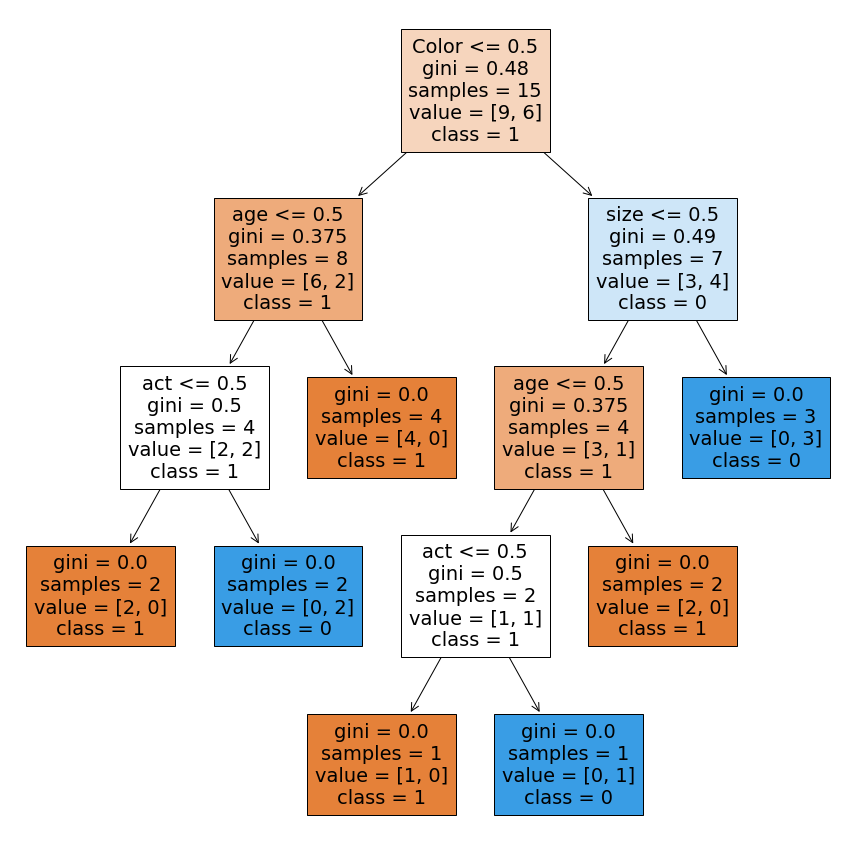

In [7]:
model = DecisionTreeClassifier(criterion='gini', random_state=42).fit(X, y)

plt.figure(figsize=(12, 12))
tree.plot_tree(model,
              feature_names=X.columns,
              class_names='10',
              filled=True);

plt.tight_layout();

## Gini Formula

### $1-\sum{p(x)^2}$

In [8]:
# inflated counts
df['inflated'].value_counts()

0    9
1    6
Name: inflated, dtype: int64

In [9]:
# apply gini formula
import numpy as np

f = 9 / 15
t = 6 / 15
print(1-((f**2)+(t**2)))

0.48


In [10]:
df.groupby(['Color', 'inflated'])['inflated'].count()

Color  inflated
0      0           6
       1           2
1      0           3
       1           4
Name: inflated, dtype: int64

In [11]:
import numpy as np

f = 6 / 8
t = 2 / 8
print(1-((f**2)+(t**2)))

0.375


In [12]:
import numpy as np

f = 3 / 7
t = 4 / 7
print(1-((f**2)+(t**2)))

0.48979591836734704


## Entropy

* Measures uncertainty in a dataset
* Count the number of unique labels in a feature
* $entropy= -p_1log(p_1)-p_2log(p_2)...$
* $p_i$ = 1, all members have property i
* $p_i$ = 0, no members have property i
* For two classes q = 1 - p
* q = 0, one class is dominant, set has minimal disorder (it is pure) and the entropy is zero
* q = p = 0.5, set is balanced and entropy is 1
* q = 1, other class is dominant and entropy is back to zero

https://book.akij.net/eBooks/2018/May/5aef50939a868/Data_Science_for_Bus.pdf (page 51 - 52)

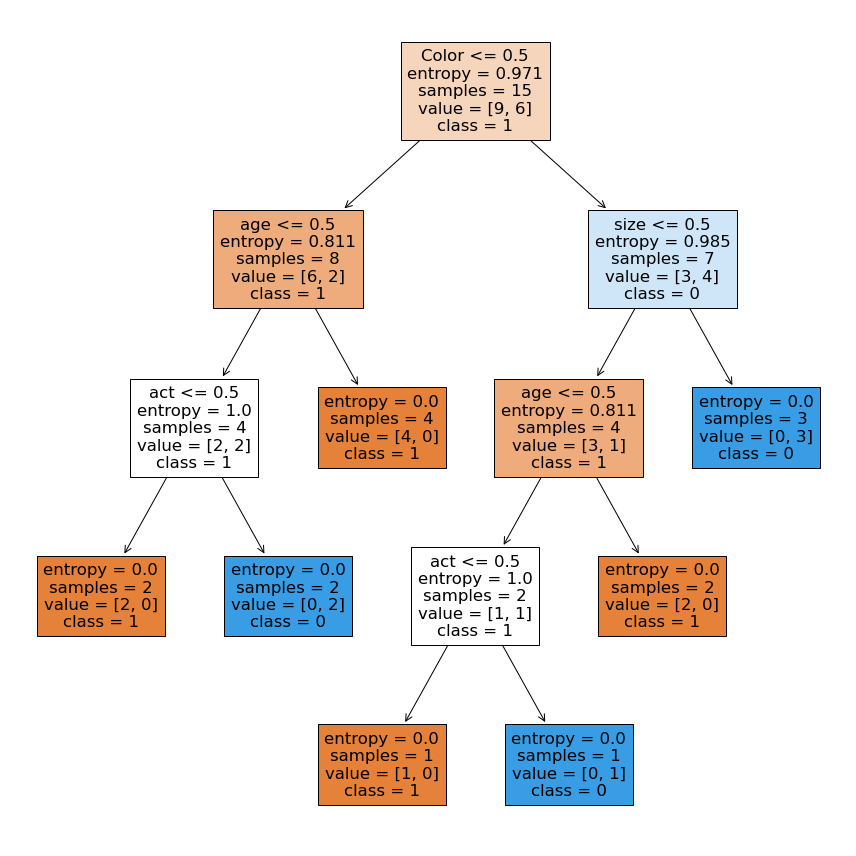

In [13]:
model = DecisionTreeClassifier(criterion='entropy', random_state=42).fit(X, y)

plt.figure(figsize=(12, 12))
tree.plot_tree(model,
              feature_names=X.columns,
              class_names='10',
              filled=True);

plt.tight_layout();

## Entropy Formula

### $-\sum{p(x)log_2p(x)}$

In [14]:
# inflated counts
df['inflated'].value_counts()

0    9
1    6
Name: inflated, dtype: int64

* for F 9 / 15
* for T 6 / 15

In [15]:
# apply entropy formula
import numpy as np

f = 9 / 15
t = 6 / 15
print(-((f * np.log2(f))+(t * np.log2(t))))

0.9709505944546686


Entropy is about 97%, a high level of disorder and low level of purity

## Information Gain

* Measures how much information X provides for y
* 1 for full bit of information
* 0 for no information
* We have less than a bit of information because there are more Fs than Ts
* If we predict F we have a 9 out of 15 chance of being right
* Smaller partitions (distributions) with a variety of diverse values,

### Gain Ratio

* Makes decision on what to split first 
* https://www.kdnuggets.com/2020/01/decision-tree-algorithm-explained.html

### Splitting the Tree

* We want to split till our target value, inflated, is no longer mixed

In [16]:
df.groupby(['Color', 'inflated'])['inflated'].count()

Color  inflated
0      0           6
       1           2
1      0           3
       1           4
Name: inflated, dtype: int64

In [17]:
# goal is to lower entropy
import numpy as np

f = 6 / 8
t = 2 / 8
print(-((f * np.log2(f))+(t * np.log2(t))))

0.8112781244591328


Split of inflated (y) based on size lowers our entropy for one split, the left split,

In [18]:
import numpy as np

f = 3 / 7
t = 4 / 7
print(-((f * np.log2(f))+(t * np.log2(t))))

0.9852281360342515


but increases entropy on the other split, the right split. We see the proportions of our two colors, yellow and purple, on y, inflated or not inflated. Color gives us a little more information on y, information gained.

### $IG(Y,X) = Entropy{(Y)}-Entropy{(Y|X)}$

How much information is gained about y, when we learn about y given X, a particular feature

* where Y = Target (inflated)
* and Y|X is class of Y given the feature

In [19]:
df['Color'].value_counts()

0    8
1    7
Name: Color, dtype: int64

In [20]:
# information gain on size
from collections import Counter

f = 9 / 15
t = 6 / 15
EY = -((f * np.log2(f))+(t * np.log2(t)))

split_values = df.groupby(['Color', 'inflated'])['inflated'].count().values

split_left1 = split_values[0] / (split_values[0] + split_values[1])
split_left2 = split_values[1] / (split_values[0] + split_values[1])
split_right1 = split_values[2] / (split_values[2] + split_values[3])
split_right2 = split_values[3] / (split_values[2] + split_values[3])

Class0 = -(((split_left1) * np.log2(split_left1))+((split_left2) * np.log2(split_left2)))
Class1 = -(((split_right1) * np.log2(split_right1))+((split_right2) * np.log2(split_right2)))

c0 = 8 / 15
c1 = 7 / 15

print('Entropy(Y):', EY)
print('Left Side:', Class0)
print('Right Side:', Class1)

EYX = (Class0 * c0) + (Class1 * c1)
print('IG(Y, X):', EY - EYX)

Entropy(Y): 0.9709505944546686
Left Side: 0.8112781244591328
Right Side: 0.9852281360342515
IG(Y, X): 0.078495797927147


Our information gain is low but our goal is to lower entropy which has been accomplished on the left side. The more the entropy removed, the greater the information gain. The higher the information gain, the better the split.

https://www.section.io/engineering-education/entropy-information-gain-machine-learning/

## Gini vs Entropy?

* https://www.kdnuggets.com/2020/01/decision-tree-algorithm-explained.html
* The Gini Impurity favours bigger partitions (distributions) and is simple to implement, whereas information gains favour smaller partitions (distributions) with a variety of diverse values, necessitating a data and splitting criterion experiment
* https://analyticsindiamag.com/gini-impurity-vs-information-gain-vs-chi-square-methods-for-decision-tree-split/
* Gini Index has values inside the interval (0, 0.5) whereas the interval of the Entropy is (0, 1). In the following figure, both of them are represented. The gini index has also been represented multiplied by two to see concretely the differences between them, which are not very significant.
* https://quantdare.com/decision-trees-gini-vs-entropy/

## Log Loss and Cross Entropy

See https://towardsdatascience.com/understanding-sigmoid-logistic-softmax-functions-and-cross-entropy-loss-log-loss-dbbbe0a17efb

## Reduction in Variance and Chi Square

See https://www.analyticsvidhya.com/blog/2020/06/4-ways-split-decision-tree/

## More on Hyperparameters

In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split

iris = load_iris()
X = iris.data
y = iris.target

df = pd.DataFrame(data=X, columns=iris.feature_names)
df['species'] = y
X_train, X_test, y_train, y_test = train_test_split(df.drop('species', axis=1), df['species'], test_size=0.20)

0.9666666666666667


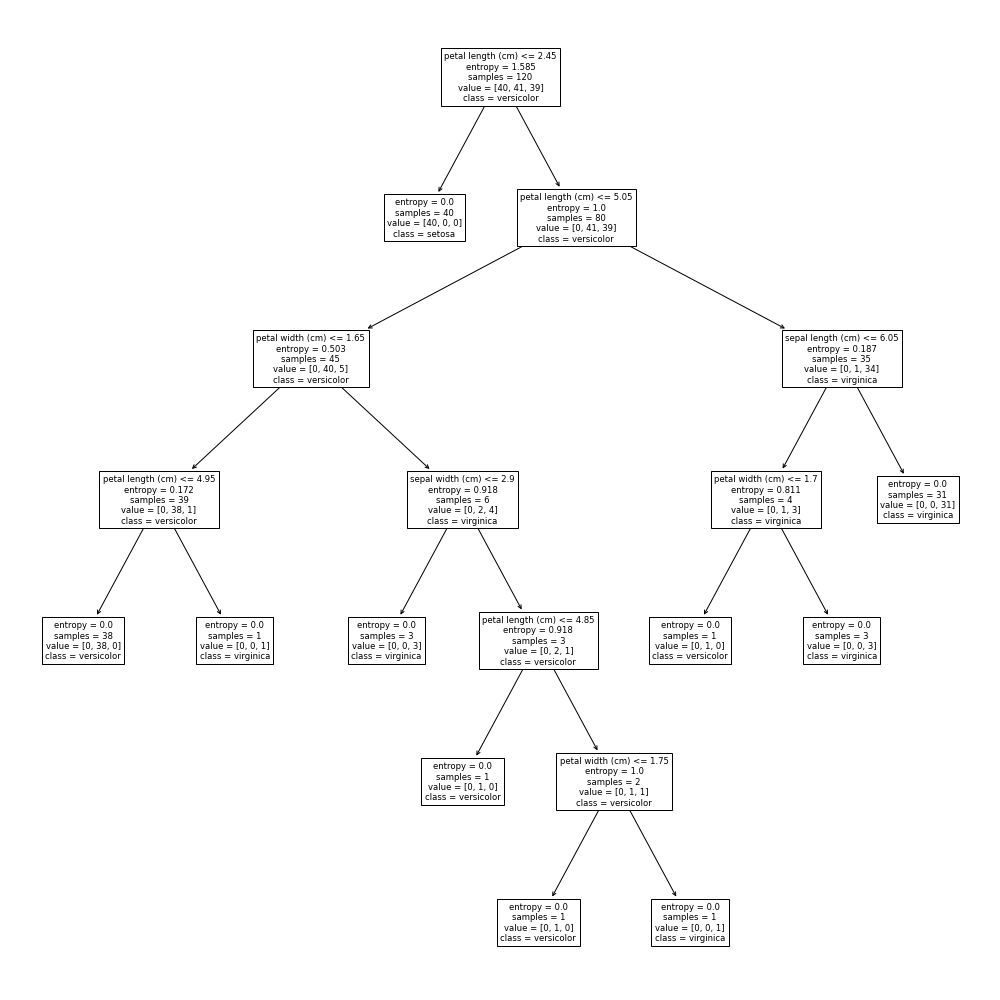

In [22]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score

hyperparameters = {
            'criterion': 'entropy'
            }

model = DecisionTreeClassifier(random_state=42).set_params(**hyperparameters)
model.fit(X_train, y_train)
predictions = model.predict(X_test)
print(accuracy_score(y_test, predictions))

plt.figure(figsize=(14, 14))
tree.plot_tree(model,
              feature_names=X_train.columns,
              class_names=['setosa', 'versicolor', 'virginica'],
              filled=False)

plt.tight_layout();

1.0


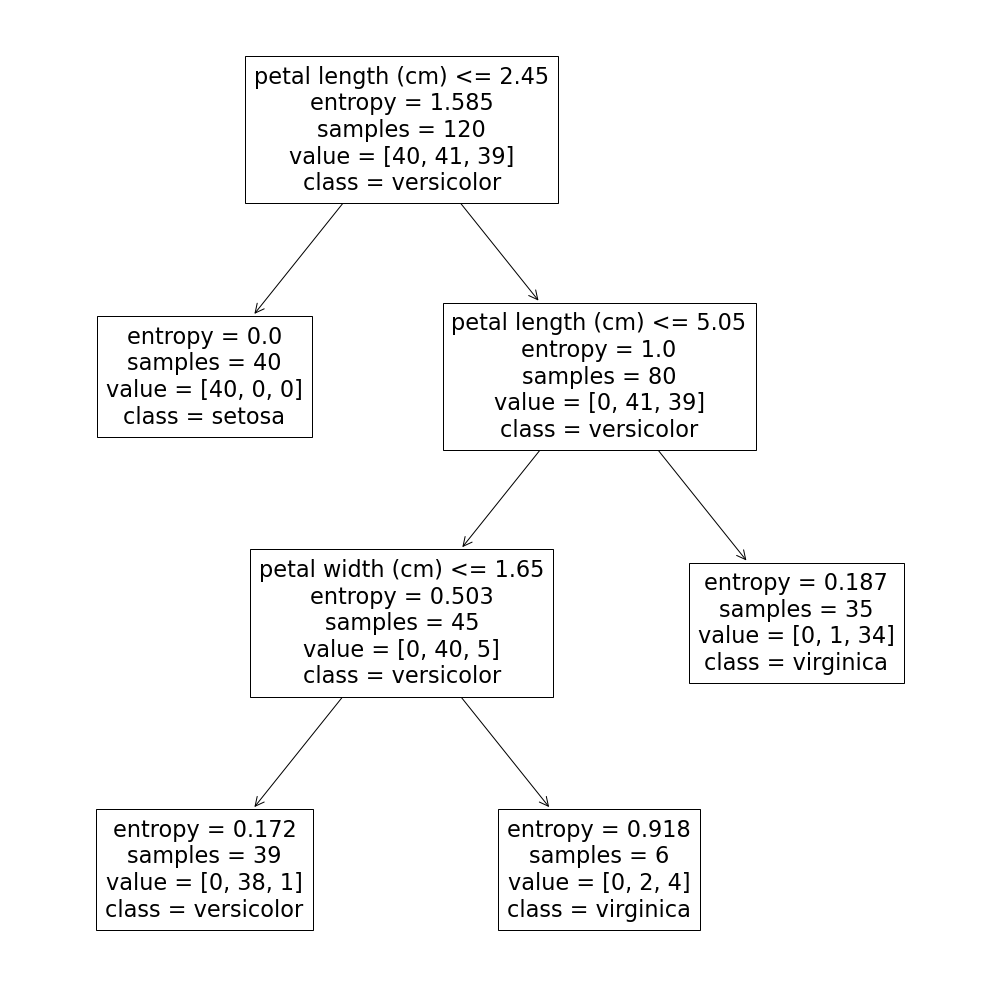

In [23]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score

hyperparameters = {
            'criterion': 'entropy',
            'max_depth': 3,
            'max_leaf_nodes': 4
            }

model = DecisionTreeClassifier(random_state=42).set_params(**hyperparameters)
model.fit(X_train, y_train)
predictions = model.predict(X_test)
print(accuracy_score(y_test, predictions))

plt.figure(figsize=(14, 14))
tree.plot_tree(model,
              feature_names=X_train.columns,
              class_names=['setosa', 'versicolor', 'virginica'],
              filled=False)

plt.tight_layout();

## Random Forest (Hyper)Parameters

Please see the following for the full list of (hyper)parameters:

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

Our choices when we performed Grid Search:

<pre>
hyperparameters = {
            'n_estimators': [50, 200],
            'criterion': ['entropy', 'gini'],
            'max_depth': [3, 4],
            'max_leaf_nodes': [7, 9],
            'bootstrap': [True, False]
            }
</pre>   

We are responsible for fine tuning (optimizing) our algorithm so we are providing a list of values, hyperparameters, we want to try out in order to find the optimal settings.

### max_depth

Number of levels in our tree. Our default iris levels are

### max_leaf_nodes

Max leaves

### bootstrap 

Bootstrapping is any test or metric that uses random sampling with replacement (e.g. mimicking the sampling process), and falls under the broader class of resampling methods. Bootstrapping assigns measures of accuracy (bias, variance, confidence intervals, prediction error, etc.) to sample estimates. This technique allows estimation of the sampling distribution of almost any statistic using random sampling methods.

https://en.wikipedia.org/wiki/Bootstrapping_(statistics)

Random forests create many decision trees that sample data. The bootstrap hyperparameter sets sampling with or without replacement.

**Rule**: Never make adjustments to your model based on test set results.
            

## Bagging

Bootstrap aggregating, also called bagging (from bootstrap aggregating), is a machine learning ensemble meta-algorithm designed to improve the stability and accuracy of machine learning algorithms used in statistical classification and regression. It also reduces variance and helps to avoid overfitting. Although it is usually applied to decision tree methods, it can be used with any type of method. Bagging is a special case of the model averaging approach.

https://en.wikipedia.org/wiki/Bootstrap_aggregating

## Our Final Model with Best (Hyper)Parameters

best_params from gridsearch: {'bootstrap': True, 'criterion': 'entropy', 'max_depth': 3, 'max_leaf_nodes': 7, 'n_estimators': 50}

<pre>
model = RandomForestClassifier(
            n_estimators=50,
            criterion='entropy,
            max_depth=3,
            max_leaf_nodes=7,
            bootstrap=True
            )
</pre> 

In [24]:
# example of classification using random forests
# https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris

iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['species'] = iris.target
X_train, X_test, y_train, y_test = train_test_split(iris_df.drop('species', axis=1), iris_df['species'], test_size=0.20)

model = RandomForestClassifier(random_state = 42).set_params(**best_parameters) # * args, ** kwargs
model.fit(X_train, y_train)
predictions = model.predict(X_test)
print(accuracy_score(y_test, predictions))
print(model.get_params)

1.0
<bound method BaseEstimator.get_params of RandomForestClassifier(criterion='entropy', max_depth=3, max_leaf_nodes=9,
                       n_estimators=50, random_state=42)>


## Feature Selection

* Random Forest Importance: selects features with values are greater than the mean of all the coefficients
* Recursive Feature Selection: removes the weakest feature per iteration and then rebuilds random forest and repeats till criterion is met

In [25]:
# random forest importance
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.feature_selection import SelectFromModel

selects = SelectFromModel(RandomForestClassifier(n_estimators=100, random_state=42))
selects.fit(X_train, y_train)
selected_feats = X_train.columns[(selects.get_support())]
selected_feats

Index(['petal length (cm)', 'petal width (cm)'], dtype='object')

In [26]:
# recursive feature selection
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE

selects = RFE(RandomForestClassifier(n_estimators=100, random_state=42), n_features_to_select=3)
selects.fit(X_train, y_train)
selected_feats = X_train.columns[(selects.get_support())]
selected_feats

Index(['sepal length (cm)', 'petal length (cm)', 'petal width (cm)'], dtype='object')

https://book.akij.net/eBooks/2018/May/5aef50939a868/Data_Science_for_Bus.pdf